# seaborn (pointplot): weight loss

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

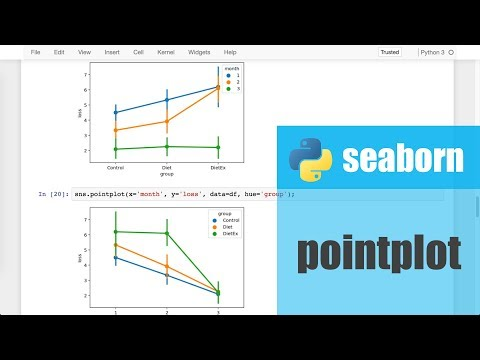

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('iGcAGABwgOg', width=720, height=405)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.25.3
seaborn version = 0.9.0


## read weight loss dataset
data on weight loss and self esteem over three months

In [4]:
url='https://github.com/prasertcbs/tutorial/raw/master/weightloss.csv'
dat=pd.read_csv(url)
dat.sample(20)

,obs,group,wl1,wl2,wl3,se1,se2,se3
13,14,Diet,5,4,1,13,14,15
4,5,Control,5,3,2,16,15,14
30,31,DietEx,6,6,3,15,13,18
19,20,Diet,4,2,1,12,11,11
15,16,Diet,6,4,2,16,15,18
11,12,Control,5,2,1,15,13,16
17,18,Diet,5,5,4,13,11,18
26,27,DietEx,9,7,3,13,12,17
8,9,Control,5,4,1,14,14,15
5,6,Control,6,5,4,17,18,18


## wide format

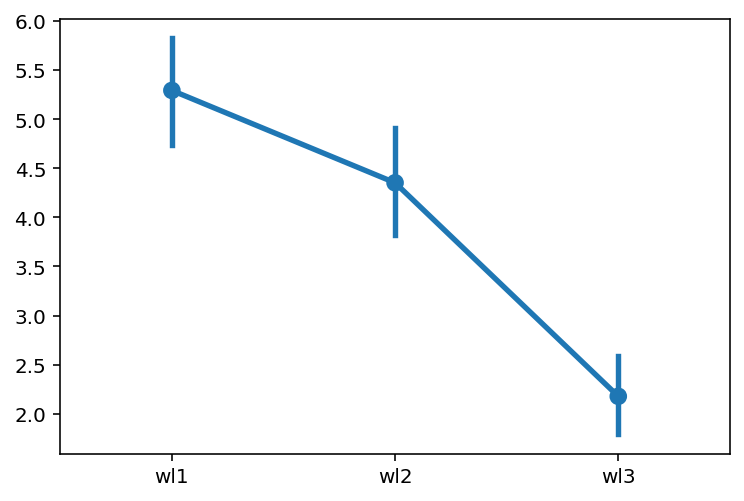

In [5]:
sns.pointplot(data=dat[['wl1', 'wl2', 'wl3']])

## convert wide to long format

In [6]:
df=dat.melt(id_vars=['obs', 'group'], 
            value_vars=['wl1', 'wl2', 'wl3'], 
            var_name='month', 
            value_name='loss')
df.head(20)

,obs,group,month,loss
0,1,Control,wl1,4
1,2,Control,wl1,4
2,3,Control,wl1,4
3,4,Control,wl1,3
4,5,Control,wl1,5
5,6,Control,wl1,6
6,7,Control,wl1,6
7,8,Control,wl1,5
8,9,Control,wl1,5
9,10,Control,wl1,3


In [7]:
df.sort_values('obs')

,obs,group,month,loss
0,1,Control,wl1,4
68,1,Control,wl3,3
34,1,Control,wl2,3
1,2,Control,wl1,4
69,2,Control,wl3,3
...,...,...,...,...
32,33,DietEx,wl1,7
66,33,DietEx,wl2,9
67,34,DietEx,wl2,6
33,34,DietEx,wl1,8


In [8]:
df['month']=df.month.str.replace('\D', '').astype('int')
df.head()

,obs,group,month,loss
0,1,Control,1,4
1,2,Control,1,4
2,3,Control,1,4
3,4,Control,1,3
4,5,Control,1,5


## pointplot

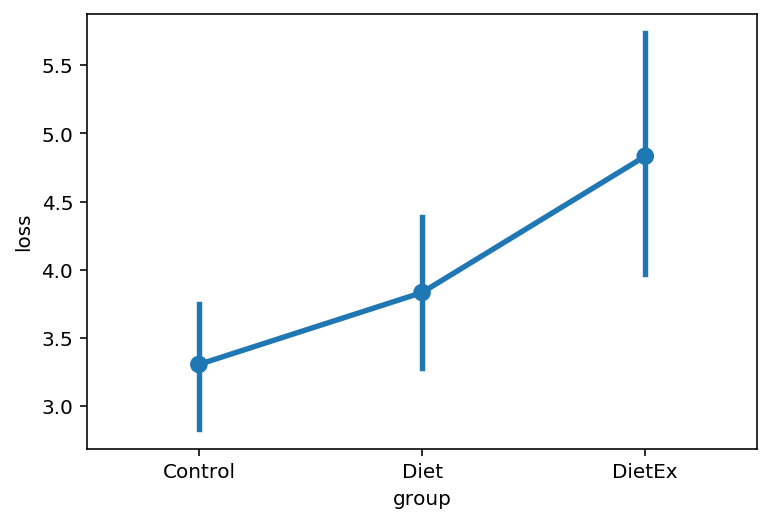

In [9]:
sns.pointplot(x='group', y='loss', data=df)

In [10]:
df.groupby('group')['loss'].mean()

group
Control    3.305556
Diet       3.833333
DietEx     4.833333
Name: loss, dtype: float64

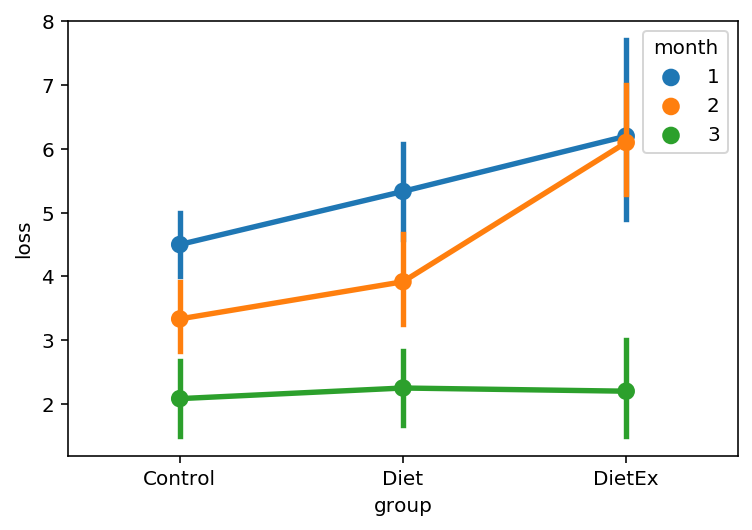

In [11]:
sns.pointplot(x='group', y='loss', data=df, hue='month');

In [12]:
df.groupby(['group', 'month'])['loss'].mean()

group    month
Control  1        4.500000
         2        3.333333
         3        2.083333
Diet     1        5.333333
         2        3.916667
         3        2.250000
DietEx   1        6.200000
         2        6.100000
         3        2.200000
Name: loss, dtype: float64

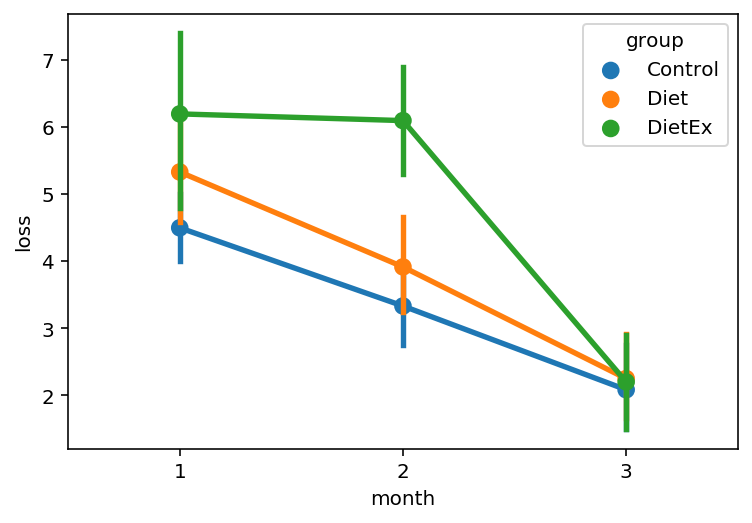

In [13]:
sns.pointplot(x='month', y='loss', data=df, hue='group');

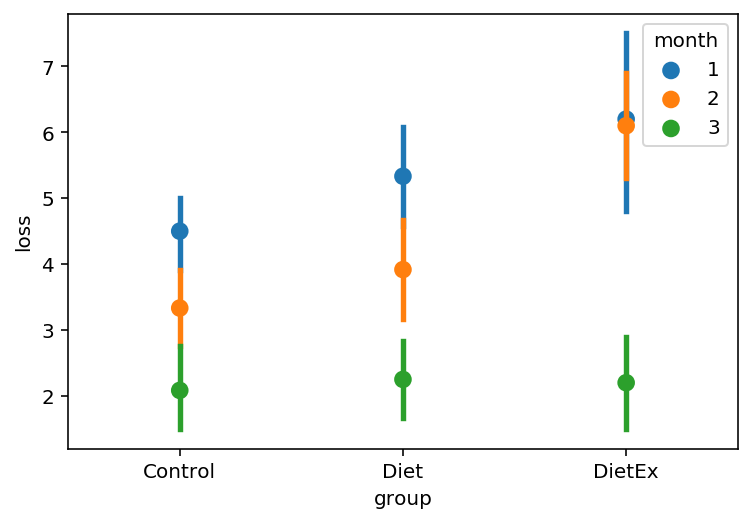

In [14]:
sns.pointplot(x='group', y='loss', data=df, hue='month', join=False)

### set 'estimator'

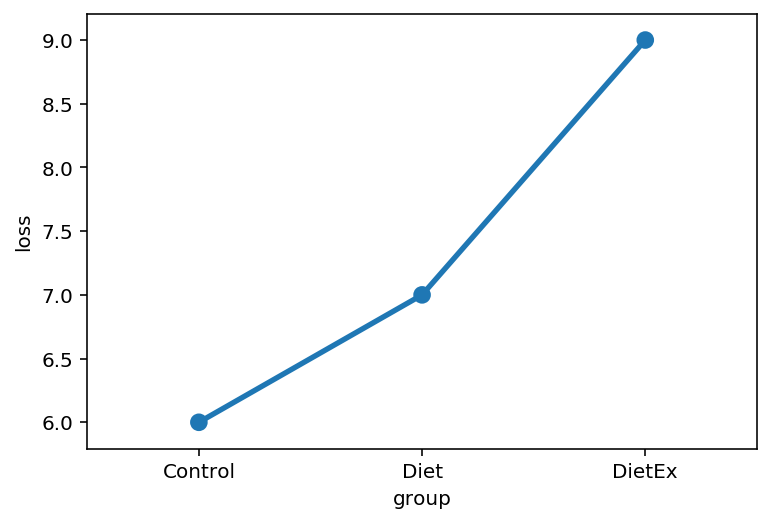

In [15]:
sns.pointplot(x='group', y='loss', data=df,
             estimator=max, ci=False)

### palette

Text(0.5, 1.0, 'weight loss experiment')

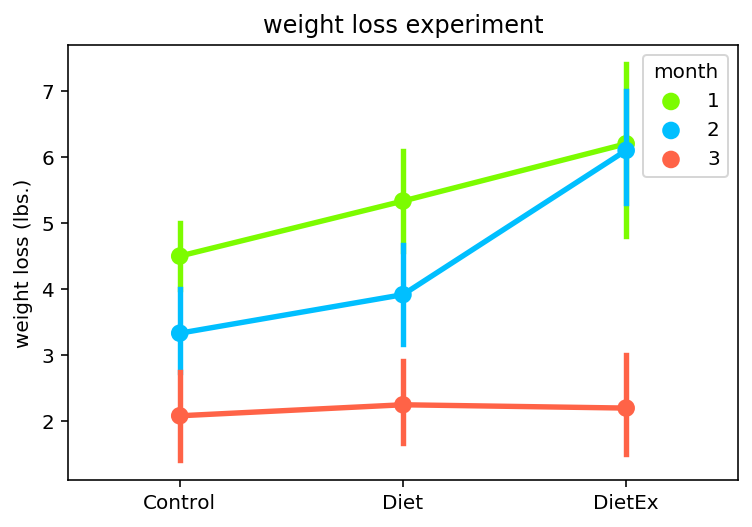

In [16]:
sns.pointplot(x='group', y='loss', data=df,
            hue='month', 
            palette=['lawngreen', 'deepskyblue', 'tomato'])
plt.xlabel('')
plt.ylabel('weight loss (lbs.)')
plt.title('weight loss experiment')

Text(0.5, 1.0, 'weight loss experiment')

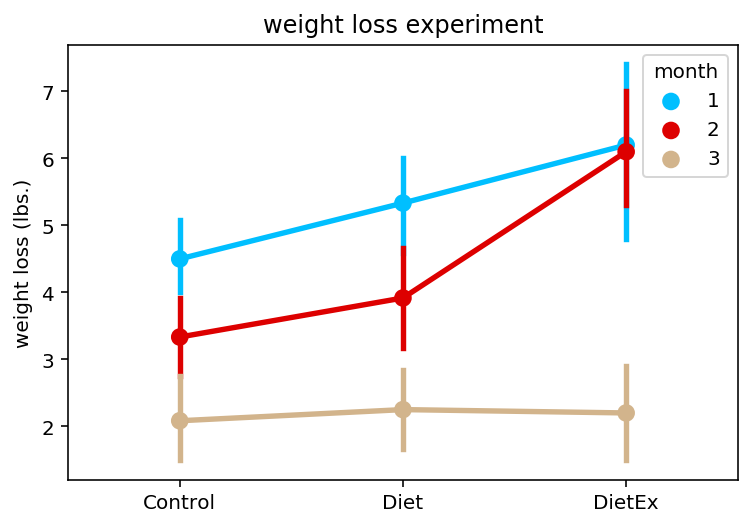

In [17]:
sns.pointplot(x='group', y='loss', data=df,
            hue='month', 
            palette={1:'deepskyblue', 2:'#dd0000', 3:'tan'})
plt.xlabel('')
plt.ylabel('weight loss (lbs.)')
plt.title('weight loss experiment')

Text(0.5, 1.0, 'weight loss experiment')

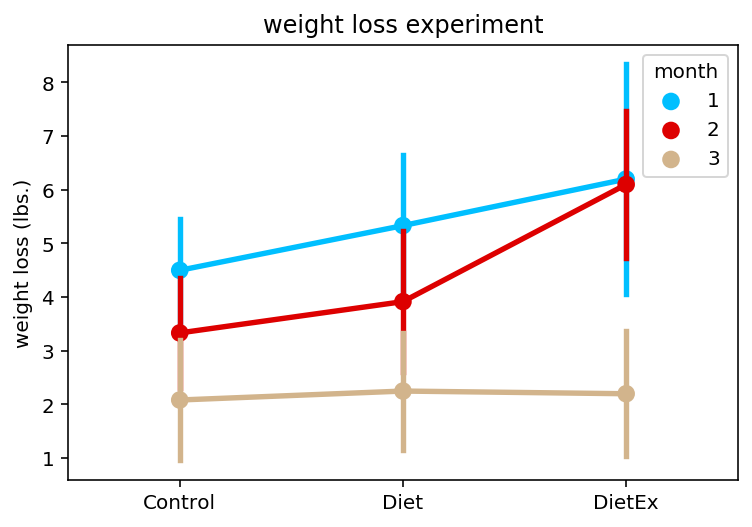

In [18]:
# ci = standard deviation
sns.pointplot(x='group', y='loss', data=df,
            hue='month', 
            ci='sd',
            palette={1:'deepskyblue', 2:'#dd0000', 3:'tan'})
plt.xlabel('')
plt.ylabel('weight loss (lbs.)')
plt.title('weight loss experiment')

### factorplot

/Users/prasert/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/prasert/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


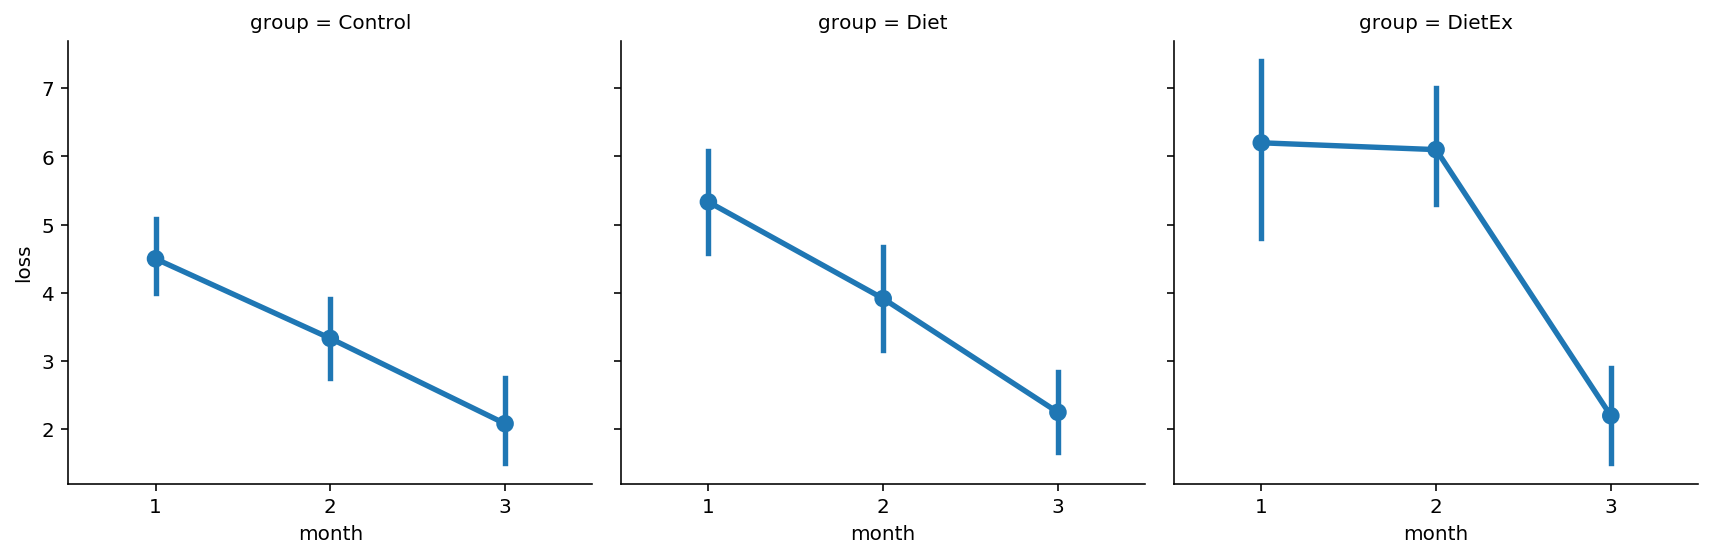

In [19]:
sns.factorplot(x='month', y='loss', data=df,
               col='group',
               kind='point',
               size=4, aspect=1);

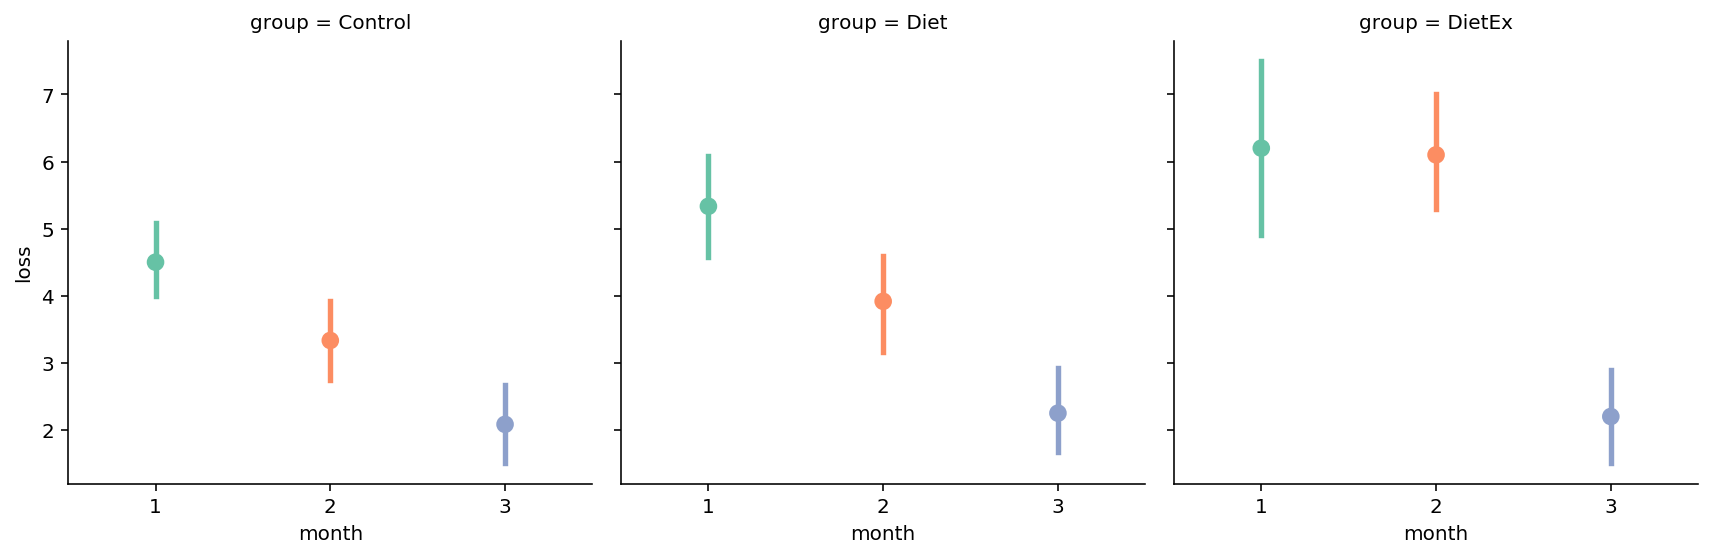

In [20]:
# set palette
sns.factorplot(x='month', y='loss', data=df,
               col='group',
               kind='point',
               palette='Set2',
               size=4, aspect=1);